In [83]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
import os

from scipy.misc import imread

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


%matplotlib inline

In [4]:
df = pd.read_csv('kimonodata.csv', parse_dates=[8])

columns = ['title', 'link','views','del1','likes','del2','comments', 'del3','date']

df.columns = columns

df.drop(['del1', 'del2','del3'], axis=1, inplace =True)

df['views'] = df.views.map(lambda x: x.replace(',', '')).astype(int)
df['likes'] = df.likes.map(lambda x: x.replace(',', '')).astype(int)
df['comments'] = df.comments.map(lambda x: x.replace(',', '')).astype(int)
df['view_logs'] = np.log(df.views).round()

In [131]:
df.describe()

,views,likes,comments,view_logs
count,156.000000,156.000000,156.000000,156.000000
mean,61562.826923,735.205128,198.294872,10.051282
std,159237.915227,1147.233023,343.764139,1.323704
min,1043.000000,10.000000,2.000000,7.000000
25%,9902.250000,248.500000,54.750000,9.000000
50%,17937.000000,401.000000,100.000000,10.000000
75%,58220.000000,764.000000,230.500000,11.000000
max,1741525.000000,9123.000000,3151.000000,14.000000


In [127]:
layout = Layout(title='James Altucher LinkedIn Articles')

trace1 = Scatter(x = df.date , y= df.views, name = 'Views')
trace2 = Scatter(x = df.date, y = df.likes , name = 'Likes')
trace3 = Scatter(x = df.date, y = df.comments, name = 'Comments')


fig = Figure(data=Data([trace1, trace2, trace3]), layout=layout)

plot_url = py.plot(fig, filename='ja_views')

In [130]:
tls.embed('https://plot.ly/~jgaw/51/james-altucher-linkedin-articles/')

In [19]:
def get_articles(link):
    request = requests.get(link)
    soup = bs(request.text) 
    some_elements = soup.find_all("div", class_="article-body")
    some_elements_clean = re.sub('<[^>]*>', '',unicode(str(some_elements), errors= 'ignore'))
    return some_elements_clean

articles = []

for i in df.link.tolist():
    articles.append(get_articles(i))
    
df['body'] = articles
#df['body'] = df.body.map(lambda x: re.sub('<[^>]*>', '',unicode(str(x), errors= 'ignore')))

In [16]:
df.to_csv('altucher.csv')
df = pd.read_csv('altucher.csv', parse_dates = [6])

In [31]:
df.columns
df.drop([u'Unnamed: 0',u'Unnamed: 0.1'],axis =1,inplace = True)

In [107]:
x = df.body.tolist()
join_x = ' '.join(x)

In [116]:
d = os.path.dirname('__file__')


# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
james_mask = imread(path.join(d, "james.jpg"))

image_colors = ImageColorGenerator(james_mask)

wc = WordCloud(background_color="white", max_words=1000, mask=james_mask,
               stopwords=STOPWORDS.add('said'),
               font_path='/Library/Fonts/AppleGothic.ttf',
               max_font_size = 60)
                           
# generate word cloud
wc.generate(join_x)

# store to file
wc.to_file(path.join(d, "james_cloud.png"))





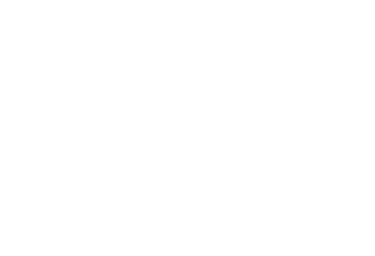

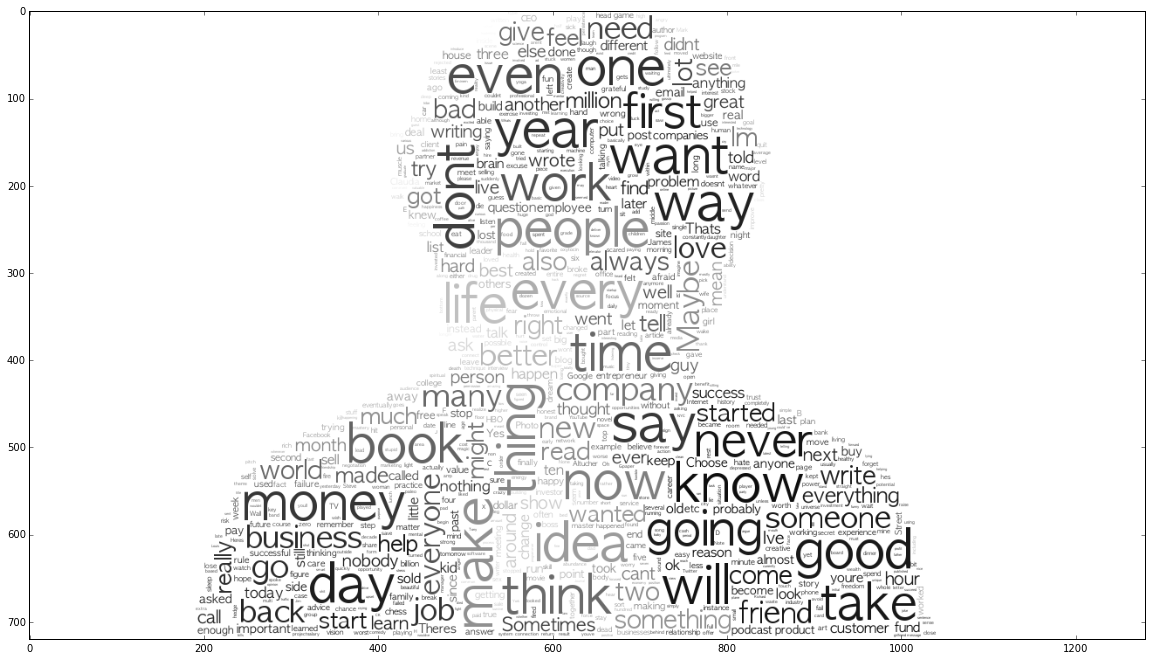

In [117]:
plt.axis("off")
plt.figure(figsize= (20,20))

plt.imshow(wc.recolor(color_func=image_colors))

